In [ ]:
#importing nesessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.distributions.empirical_distribution import ECDF
from datetime import date
import seaborn as sns

In [ ]:
#reading input dataset from csv to dataframe
df = pd.read_csv('..\Step 1. Data Wrangling\monthly-production.csv')
df[['RPT_DATE','Dt_Treat']] = df[['RPT_DATE','Dt_Treat']].astype('datetime64')
df.info()

In [ ]:
#Creating average volume of fluids produced each days for each month of production record
df_ind=df.set_index(['API','RPT_DATE'])
#df_trim=df_ind
df_ind['OIL_per_day'] = df_ind['OIL_RUNS']/df_ind['DAYS_PROD']
df_ind['GAS_per_day'] = df_ind['MCF_GAS']/df_ind['DAYS_PROD']
df_ind['WATER_per_day'] = df_ind['BBLS_WTR']/df_ind['DAYS_PROD']
df_trim=df_ind[['DAYS_PROD','OIL_per_day', 'GAS_per_day', 'WATER_per_day', 'Dt_Treat']]
df_trim = df_trim.fillna(0)
df_trim

In [ ]:
df

In [5]:
#some statistics on the cum oil production for each well
df_max = df[['API','OIL_RUNS']]
df_max.groupby('API').agg('sum').describe()

,OIL_RUNS
count,8.939000e+03
mean,1.301958e+05
std,1.236960e+05
min,0.000000e+00
25%,6.137950e+04
50%,1.064270e+05
75%,1.639570e+05
max,3.088040e+06


In [6]:
#Loading cleaned dataset with features and production metric
df_ml = pd.read_csv('..\Step 1. Data Wrangling\DataWrangling_clean_dataset.csv')
df_ml

,Unnamed: 0,api,bottom,fluid_bbl,fluid_bbl_per_ft,fluid_gal,fluid_gal_per_ft,ft_per_stage,lateral_length,max_treat_press,...,Footages,Field_Name,Produced_Pools,Wellbore,Latitude,Longitude,Well_Type,Well_Status,CTB,Well_Status_Date
0,0,33007015830000,9441,47,1,1998,46,43,43,0,...,906 FSL 1197 FEL,BIG STICK,MADISON,DIRECTIONAL,47.112737,-103.418030,OG,A,406270.0,2010-05-26
1,1,33007016320000,20810,57661,6,2421762,252,319,9586,8461,...,2400 FSL 300 FEL,ST. DEMETRIUS,BAKKEN,HORIZONTAL,47.088015,-103.244706,OG,A,117768.0,2012-07-25
2,2,33007016390000,7942,23,5,1000,250,4,4,0,...,2100 FSL 1980 FEL,WILDCAT,TYLER,VERTICAL,46.736696,-103.553665,OG,A,118216.0,2011-10-23
3,3,33007016410000,20457,48944,5,2055648,214,9572,9572,8968,...,505 FSL 541 FEL,BIG STICK,BAKKEN,HORIZONTAL,47.111642,-103.415385,OG,A,118502.0,2010-11-11
4,4,33007016440000,9338,59,0,2500,39,64,64,0,...,990 FSL 640 FEL,BIG STICK,MADISON,VERTICAL,47.069474,-103.415609,OG,A,406270.0,2010-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,5841,33105022070000,19357,66738,12,2802996,510,312,11497,9486,...,1100 FNL 300 FWL,TRUAX,BAKKEN,HORIZONTAL,48.108048,-103.343890,OG,A,120857.0,2012-01-28
5842,5842,33105022840000,21123,73233,17,3075786,753,279,10083,9341,...,350 FNL 1715 FEL,WILLISTON,BAKKEN,HORIZONTAL,48.196664,-103.567636,OG,A,121146.0,2011-12-02
5843,5843,33105024670000,19260,52566,5,2207772,251,313,18297,8000,...,331 FNL 2030 FWL,STRANDAHL,BAKKEN,HORIZONTAL,48.459011,-103.876229,OG,A,122001.0,2012-06-21
5844,5844,33105024800000,20761,89045,21,3739890,911,286,8700,9906,...,2050 FNL 270 FWL,TRUAX,BAKKEN,HORIZONTAL,48.090853,-103.279816,OG,A,122074.0,2013-06-06


In [7]:
df_ml.keys()

Index(['Unnamed: 0', 'api', 'bottom', 'fluid_bbl', 'fluid_bbl_per_ft',
       'fluid_gal', 'fluid_gal_per_ft', 'ft_per_stage', 'lateral_length',
       'max_treat_press', 'max_treat_rate', 'propp_lbs', 'propp_lbs_per_ft',
       'stages', 'top', 'treatment_date', 'number_treatments', 'interval',
       'cum_oil_365', 'file_no', 'Current_Operator', 'Current_Well_Name',
       'Lease_Name', 'Lease_Number', 'Original_Operator', 'Original_Well_Name',
       'Spud_Date', 'TD', 'County_Name', 'Township', 'Range', 'Section', 'QQ',
       'Footages', 'Field_Name', 'Produced_Pools', 'Wellbore', 'Latitude',
       'Longitude', 'Well_Type', 'Well_Status', 'CTB', 'Well_Status_Date'],
      dtype='object')

First, I need to visualize the oil production for different wells to get more familiar with the quantity I am trying to predict. The raw data is given as oil production for each month. I am simplifying the problem a little by predicting cumulative production for the first year. It is a good metric for overall well performance and can be used to separate good wells from bad ones. 
The following plots shows the production profile for a good performing well. The left plot shows monthly oil production and the right plot shows the cumulative production over the same period. The blue line indicates the time stamp for the first year of production. The red line is the month of well treatment. 
Similar plot is created for a low performing well. 

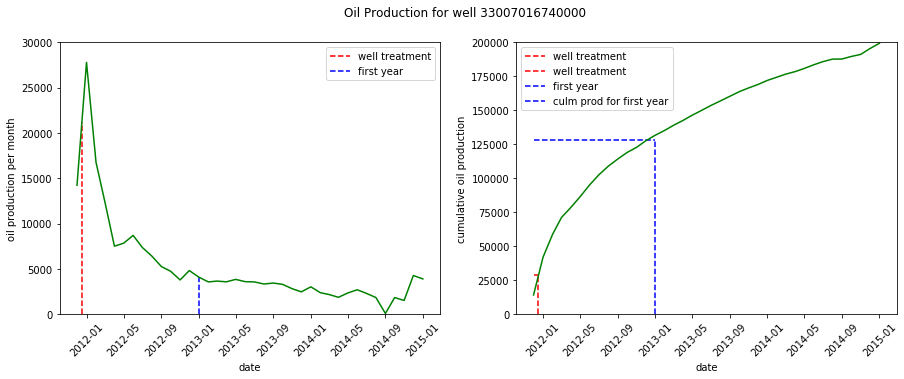

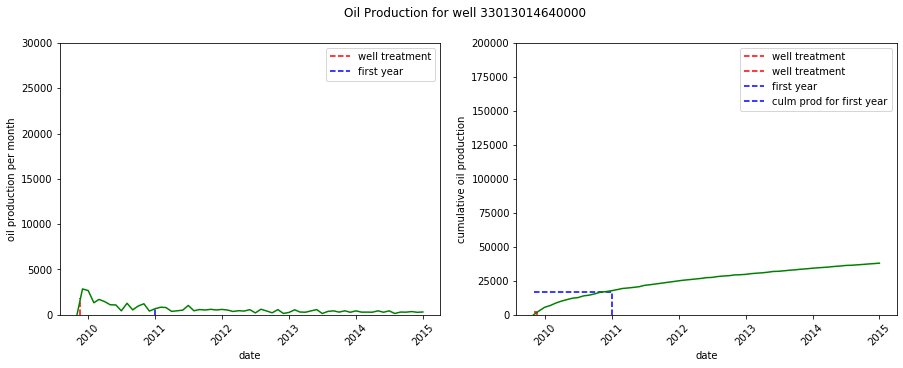

In [9]:
#Creating production profiles for each well and saving figures
#for api in df_ml['api']:
for api in [33007016740000, 33013014640000]:    
    df_well = df_trim.loc[api,:]
    
    if len(df_well)>2:
        #print('here')
        #stempData = stempData-stempData[0]
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Oil Production for well '+ str(api))
        dateData = df_well.index
        oilData = df_well['OIL_per_day']*df_well['DAYS_PROD']

        cum_prod_first_year = df_ml[df_ml['api']==api]['cum_oil_365']
        
        endDate = dateData[oilData.cumsum()>cum_prod_first_year.values[0]][0]
        
        plt.subplot(1, 2, 1)
        plt.plot(dateData,oilData,'g')
        plt.xlabel('date')
        plt.ylabel('oil production per month')
        plt.xticks(rotation='45')
        for i in df_well['Dt_Treat'].unique():
            l = np.interp(i, dateData,  oilData)
            plt.vlines(i, 0, l,colors='r', linestyles='--', label='well treatment')
        plt.vlines(endDate, 0, oilData[dateData==endDate],colors='b', linestyles='--', label='first year')
        plt.ylim(0, 30000)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(dateData,oilData.cumsum(),'g')
        plt.xlabel('date')
        plt.ylabel('cumulative oil production')
        plt.xticks(rotation='45')
        for i in df_well['Dt_Treat'].unique():
            treatOil = oilData.cumsum()[dateData==i]
            l = np.interp(i, dateData,  oilData.cumsum())
            plt.vlines(i, 0, l, colors='r', linestyles='--', label='well treatment')
            plt.hlines(l, dateData[0], i, colors='r', linestyles='--', label='well treatment')
        plt.vlines(endDate, 0, cum_prod_first_year.values[0],colors='b', linestyles='--', label='first year')
        plt.hlines(cum_prod_first_year.values[0], dateData[0],endDate, colors='b', linestyles='--', label='culm prod for first year')
        plt.ylim(0, 200000)
        plt.legend()

        plt.savefig('ProductionPlots\oil_production_'+str(api)+'.png')

In [10]:
#Dataframe with days before treatment and production metric
df_min = df[['API','RPT_DATE','Dt_Treat']]
df_min = df_min.groupby('API').agg('min')
df_min['TreatDays']=df_min['Dt_Treat']-df_min['RPT_DATE']
df_min.reset_index()
#df_min[df_min.index==33007016320000]
df_min=df_min.merge(df_ml, left_on='API', right_on='api')[['api','TreatDays','cum_oil_365']]
df_min['TreatDays']=[i.days for i in df_min['TreatDays']]
df_min

,api,TreatDays,cum_oil_365
0,33007015830000,11,28758.0
1,33007016320000,18,19649.0
2,33007016380000,-3,39719.0
3,33007016390000,-175,10203.0
4,33007016410000,0,33166.0
...,...,...,...
5841,33105031490000,0,49423.0
5842,33105031600000,19,95125.0
5843,33105031610000,-1,53310.0
5844,33105031620000,-25,89055.0


One interesting question to investigate based on these plots is theater or not well performance depends on how fast the well treatment was performed after the well was brough on production. The intuition tells us that the sooner well treatment is performed the better well production should be. I expect a positive correlation between number of days between first well production and well treatment and cumulation production for the first year. 
First let’s plot a histogram of number of days between first well production and well treatment. 


(-200, 200)

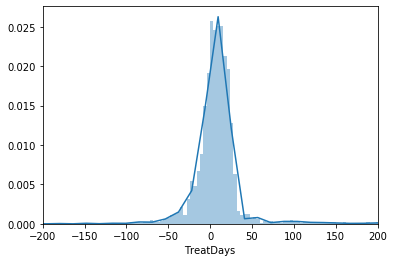

In [11]:
sns.distplot(df_min['TreatDays'],bins=500)
#ax.set_yscale('log')
plt.xlim((-200,200))

We can see that most wells have treatment job withing the first two months of production onset. It is interesting that almost half of the wells had treatment jobs preceding the production (negative values on the histogram).
The histogram of cumulative oil for the first year of production is well behaved distribution skewed towards the right-hand side. 


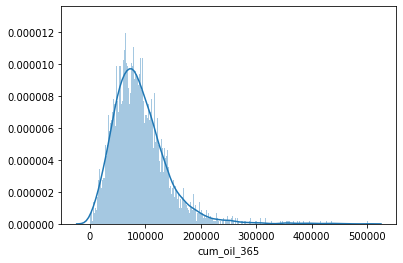

In [12]:
sns.distplot(df_min['cum_oil_365'],bins=500)
#ax.set_yscale('log')
#plt.xlim((-200,200))

The cross plot of the two variables shows that they are not strongly correlated. First year production of the well does not strongly depend on merely when the well treatment was performed. I believe the details of the treatment play an important role here. 

(-250, 250)

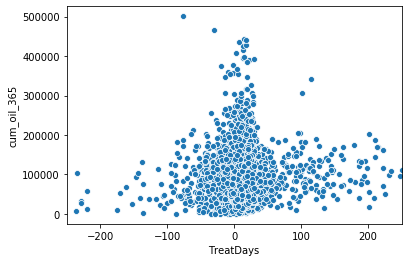

In [13]:
sns.scatterplot(data=df_min,x='TreatDays',y='cum_oil_365')
plt.xlim(-250,250)

In [14]:
df_ml['Produced_Pools']=df_ml['Produced_Pools'].astype('category')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          5846 non-null   int64   
 1   api                 5846 non-null   int64   
 2   bottom              5846 non-null   int64   
 3   fluid_bbl           5846 non-null   int64   
 4   fluid_bbl_per_ft    5846 non-null   int64   
 5   fluid_gal           5846 non-null   int64   
 6   fluid_gal_per_ft    5846 non-null   int64   
 7   ft_per_stage        5846 non-null   int64   
 8   lateral_length      5846 non-null   int64   
 9   max_treat_press     5846 non-null   int64   
 10  max_treat_rate      5846 non-null   float64 
 11  propp_lbs           5846 non-null   int64   
 12  propp_lbs_per_ft    5846 non-null   int64   
 13  stages              5846 non-null   int64   
 14  top                 5846 non-null   int64   
 15  treatment_date      5846 non-null   ob

This plot shows the geographical position of all the wells, colored by the county name. Bigger circles indicate bigger cumulative production for the first year. This picture does not discriminate production interval.

(array([46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5]),
 <a list of 7 Text xticklabel objects>)

<Figure size 720x1440 with 0 Axes>

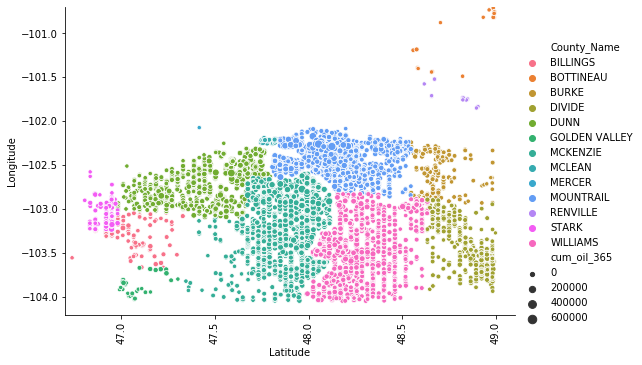

In [15]:
plt.figure(figsize=(10,20))
sns.relplot(x="Latitude", y="Longitude", size="cum_oil_365", hue="County_Name", height=5, data=df_ml,aspect=1.5)
plt.xlim((46.7,49.1))
plt.ylim((-104.2,-100.7))
plt.xticks(rotation=90)

From the figure below we can see that producing intervals may play important role for production prediction. 
Some zones have shown to have better production than others. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

<Figure size 720x1440 with 0 Axes>

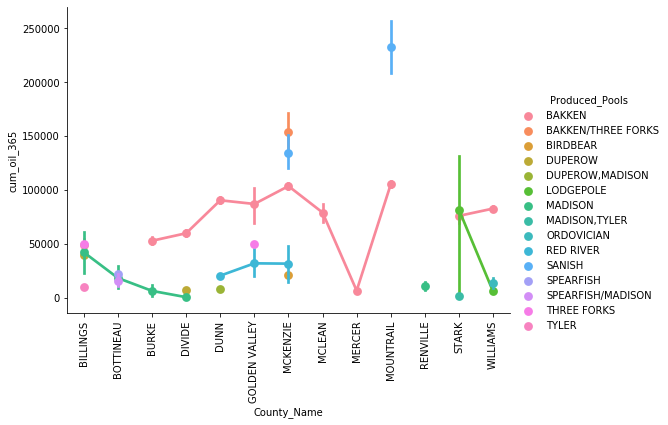

In [17]:
plt.figure(figsize=(10,20))
sns.catplot(x="County_Name", y="cum_oil_365", hue="Produced_Pools", kind="point", data=df_ml,aspect=1.5);
plt.xticks(rotation=90)

Next plot shows that most of the wells are producing from the BAKKEN interval. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

<Figure size 720x1440 with 0 Axes>

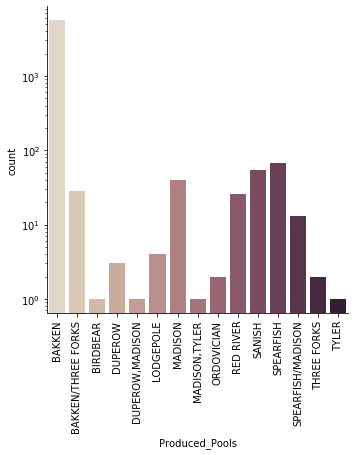

In [18]:
#sns.boxplot(x='Produced_Pools', y='cum_oil_365', hue='Produced_Pools',data=df_ml)
plt.figure(figsize=(10,20))
#fig, ax = plt.subplots(figsize=(10,5))
sns.catplot(x="Produced_Pools", kind="count", palette="ch:.25", data=df_ml)
plt.yscale("log")
plt.xticks(rotation=90)

BAKKEN production is highest in the north.

C:\Users\olyab\Anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


(array([0. , 0.5, 1. ]), <a list of 0 Text xticklabel objects>)

<Figure size 720x1440 with 0 Axes>

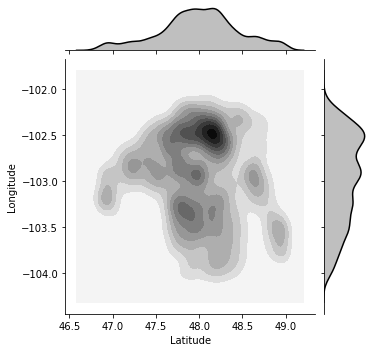

In [19]:
plt.figure(figsize=(10,20))
#fig, ax = plt.subplots(figsize=(10,5))
sns.jointplot(x="Latitude", y="Longitude", kind="kde", color="k", height=5, data=df_ml[df_ml['Produced_Pools']=='BAKKEN'],aspect=1.5)
plt.xticks(rotation=90)

Wellbore direction is also important for increasing production. Vertical wells traverses the producing interval perpendicular and are the least productive. Horizontal wells are drilled parallel to the strata boundaries and are most productive as they intersect more of the productive interval.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

<Figure size 720x1440 with 0 Axes>

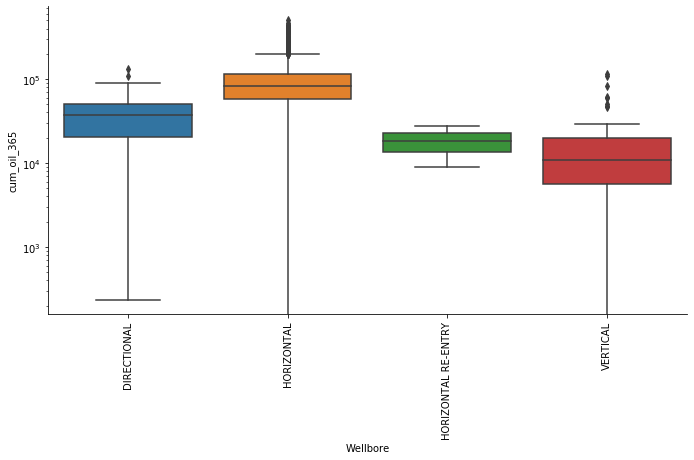

In [20]:
plt.figure(figsize=(10,20))
#fig, ax = plt.subplots(figsize=(10,5))
sns.catplot(x="Wellbore", y="cum_oil_365", kind="box", data=df_ml.sort_values("Wellbore"), height=5, aspect=2)
plt.yscale("log")
plt.xticks(rotation=90)